In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sofa16qamlib import * #Llamamos nuestra librería
from sklearn.cluster import KMeans
import mglearn

num_sym = 500
sym_tx = np.random.choice(np.arange(0,16), size=num_sym) #Generamos indices de símbolos aleatorios (0,15)
sig_tx=modulate(sym_tx) #modula

Phi = 10 #ruido de fase
Rot=0 #rotación
SNR=30
errv=[]

sig_rx=noiselnl(sig_tx,SNR,Phi,Rot) #agrega ruido
print(sig_rx)
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])
print(X)

kmeans = KMeans(n_clusters=16)
kmeans.fit(X)

labels = np.asarray(demodulate(kmeans.cluster_centers_[:,0]+1j*kmeans.cluster_centers_[:,1]))           #demodula
print("Labels")
print(labels)
print("Kmeans labels")
print(kmeans.labels_)
assignments = labels[kmeans.labels_]
print("assignments")
print(assignments)

errores=biterr(assignments,sym_tx)       #conteo de errores de bit
BER_tra=(errores/(num_sym*4))    #divide por la cantidad total de bits
print(1-BER_tra)

[-0.99783606+0.96294058j -2.61381813-3.37641876j  2.71115277-1.34721813j
  2.7843316 -3.23079852j  0.89852717-3.00620343j  1.85149676-3.75004019j
 -3.14868619+1.07815319j  1.63519665-2.7254493j   0.80240105-1.17665898j
 -1.27277015+0.74618849j  0.99176535+3.01871753j  3.04973342+1.11049602j
  1.06914078+2.98602245j -3.04841048-2.88872444j  2.82989539-1.39099502j
  1.90709707-3.86208697j  3.5360347 -2.2524923j   3.70708198+1.80566988j
 -3.11304582-0.48818724j -3.12453897-2.9313828j   1.13875002+0.84176874j
  1.75754045-2.60600258j  1.69659274-2.89833135j  1.28579372-3.00053414j
 -3.09362006-0.19557139j -2.04070792+2.31555134j  3.29711998+2.71317401j
  1.94288533+2.62715671j -3.38854291-2.66090758j  3.00445872-1.01781717j
  3.29399818+2.68455046j -3.03699769+0.282066j   -0.94674052+3.05369869j
 -3.09490967+1.1030068j  -3.12716095+0.6789124j  -3.47450766-2.19619274j
 -3.11380042+0.46483688j  3.46067309-2.38328593j -3.02846292+1.19865524j
  3.26811376-2.6312693j  -2.76787603-1.51208946j -3

Labels
[ 2 15 12 11  0  5  8 14 13  3 10  6  9  7  4  1]
Kmeans labels
[13  4 12  6  2  2  9  2  8 13  7  3  7  4 12  2  6  3 15  4  1  2  2  2
 15  0 10  7  4 12 10  9 11  9  9  4  9  6  9  6 15 15  2  1  3  9  7 15
  6 14  8  0 12 12  2 11 11 14  3  9 14 11 12  0  1  7  8 11 10  9  0  1
  4  1  8  1 14  5 10  1  2 15 15  1 13  6  8 14  4 14 12 12  8 10  8  4
 10 15 11  2  1 12  9 12  8  9 13  5  5 11 13 10 12 14  1 10  8  0  9  0
 15 13 15  0 12  5  0  1  7 11  6  3 14 14 14  1  7  0 14  9 11  3 12  4
  4 12 10 11 12 13  3  7  0  0  1  5 14  2 12  6 14  1  4 14  1  0 15  1
  6  0 11  8 11  9  1  1 13 14  5  2 10  6  5  7 15  9  1 11 11  3  4 14
  6  7  4 15 15 11 11  2  0  2  8 10 15 12 14  0 11 10  7 13  3  2  7 11
 10 11  3  8 15  7  5 13  6  5 15  0  6  5  9  8  9 12 11 13  3 11 14 15
  5 15 12 11  5  4  3 12  8  2  0  9  1  3  9  7  1 12  8 15  8  5  4 13
  4  6  5 12  9 15 11 13 10  6  2 11 10 15  2  9 12  7  4  1  6 10  2  5
  1 12  4  5 12 12  0 14  5  9 14 11  5  2 13 10 13 1

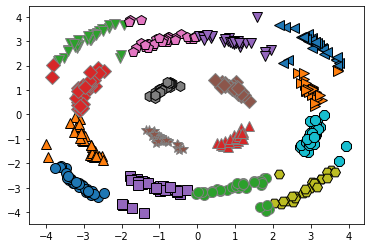

In [122]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments)

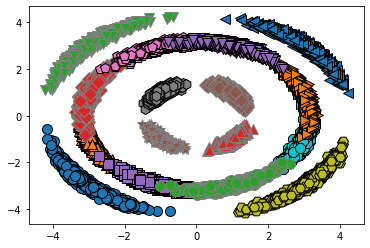

In [96]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], sym_tx)

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sofa16qamlib import * #Llamamos nuestra librería

num_sym = 20000
sym_tx = np.random.choice(np.arange(0,16), size=num_sym) #Generamos indices de símbolos aleatorios (0,15)
sig_tx=modulate(sym_tx) #modula

Phi = 0 #ruido de fase
Rot=0 #rotación
SNR=20
errv=[]

sig_rx=noiselnl(sig_tx,SNR,Phi,Rot) #agrega ruido
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])

sym_rx=demodulate(sig_rx)           #demodula
errores=biterr(sym_rx,sym_tx)       #conteo de errores de bit
BER_tra=(errores/(num_sym*4))    #divide por la cantidad total de bits
print(1-BER_tra)

0.9999875


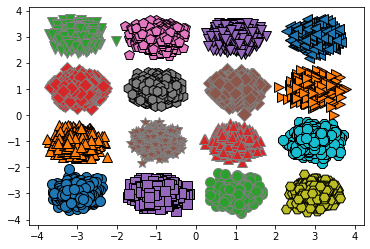

In [117]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], sym_rx)

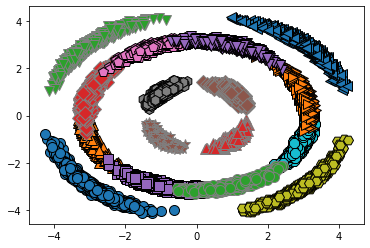

In [99]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], sym_tx)

In [109]:
from sklearn.model_selection import train_test_split
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])
y = sym_tx

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [111]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Score for Gaussian Naive Bayes is:',gnb.score(X_test,y_test))
y_pred = gnb.predict(X_test)

Score for Gaussian Naive Bayes is: 0.959


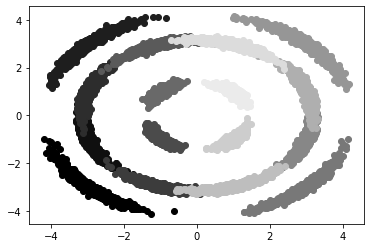

In [106]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color=np.asarray([0,0,0]), label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color=np.asarray([15,15,15])/255, label="Estado 1")
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], color=np.asarray([30,30,30])/255, label="Estado 0")
plt.scatter(X_train[y_train==3][:,0], X_train[y_train==3][:,1], color=np.asarray([45,45,45])/255, label="Estado 1")
plt.scatter(X_train[y_train==4][:,0], X_train[y_train==4][:,1], color=np.asarray([60,60,60])/255, label="Estado 0")
plt.scatter(X_train[y_train==5][:,0], X_train[y_train==5][:,1], color=np.asarray([75,75,75])/255, label="Estado 1")
plt.scatter(X_train[y_train==6][:,0], X_train[y_train==6][:,1], color=np.asarray([90,90,90])/255, label="Estado 0")
plt.scatter(X_train[y_train==7][:,0], X_train[y_train==7][:,1], color=np.asarray([105,105,105])/255, label="Estado 1")
plt.scatter(X_train[y_train==8][:,0], X_train[y_train==8][:,1], color=np.asarray([120,120,120])/255, label="Estado 0")
plt.scatter(X_train[y_train==9][:,0], X_train[y_train==9][:,1], color=np.asarray([135,135,135])/255, label="Estado 1")
plt.scatter(X_train[y_train==10][:,0], X_train[y_train==10][:,1], color=np.asarray([150,150,150])/255, label="Estado 0")
plt.scatter(X_train[y_train==11][:,0], X_train[y_train==11][:,1], color=np.asarray([175,175,175])/255, label="Estado 1")
plt.scatter(X_train[y_train==12][:,0], X_train[y_train==12][:,1], color=np.asarray([190,190,190])/255, label="Estado 0")
plt.scatter(X_train[y_train==13][:,0], X_train[y_train==13][:,1], color=np.asarray([205,205,205])/255, label="Estado 1")
plt.scatter(X_train[y_train==14][:,0], X_train[y_train==14][:,1], color=np.asarray([220,220,220])/255, label="Estado 0")
plt.scatter(X_train[y_train==15][:,0], X_train[y_train==15][:,1], color=np.asarray([235,235,235])/255, label="Estado 1")

In [127]:
print(X_train[y_train==0][0])
point = X_train[y_train==0][0]

[-3.60599605 -2.09908471]


In [128]:
print(X_train[y_train==1][0])
centroid = X_train[y_train==1][0]

[-2.81851061 -1.47519846]


In [130]:
print(np.sqrt(np.sum((point-centroid)**2)))

1.004672772269475


In [131]:
print((np.sqrt(np.sum(point**2)) - np.sqrt(np.sum(centroid**2))))

0.9912248627781124


In [ ]:
print(np.sqrt(np.sum((X_train[y_train==0][0]-X_train[y_train==1][0])**2)))

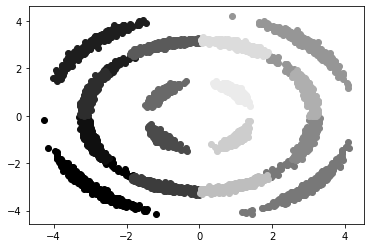

In [112]:
plt.scatter(X_test[y_pred==0][:,0], X_test[y_pred==0][:,1], color=np.asarray([0,0,0]), label="Estado 0")
plt.scatter(X_test[y_pred==1][:,0], X_test[y_pred==1][:,1], color=np.asarray([15,15,15])/255, label="Estado 1")
plt.scatter(X_test[y_pred==2][:,0], X_test[y_pred==2][:,1], color=np.asarray([30,30,30])/255, label="Estado 0")
plt.scatter(X_test[y_pred==3][:,0], X_test[y_pred==3][:,1], color=np.asarray([45,45,45])/255, label="Estado 1")
plt.scatter(X_test[y_pred==4][:,0], X_test[y_pred==4][:,1], color=np.asarray([60,60,60])/255, label="Estado 0")
plt.scatter(X_test[y_pred==5][:,0], X_test[y_pred==5][:,1], color=np.asarray([75,75,75])/255, label="Estado 1")
plt.scatter(X_test[y_pred==6][:,0], X_test[y_pred==6][:,1], color=np.asarray([90,90,90])/255, label="Estado 0")
plt.scatter(X_test[y_pred==7][:,0], X_test[y_pred==7][:,1], color=np.asarray([105,105,105])/255, label="Estado 1")
plt.scatter(X_test[y_pred==8][:,0], X_test[y_pred==8][:,1], color=np.asarray([120,120,120])/255, label="Estado 0")
plt.scatter(X_test[y_pred==9][:,0], X_test[y_pred==9][:,1], color=np.asarray([135,135,135])/255, label="Estado 1")
plt.scatter(X_test[y_pred==10][:,0], X_test[y_pred==10][:,1], color=np.asarray([150,150,150])/255, label="Estado 0")
plt.scatter(X_test[y_pred==11][:,0], X_test[y_pred==11][:,1], color=np.asarray([175,175,175])/255, label="Estado 1")
plt.scatter(X_test[y_pred==12][:,0], X_test[y_pred==12][:,1], color=np.asarray([190,190,190])/255, label="Estado 0")
plt.scatter(X_test[y_pred==13][:,0], X_test[y_pred==13][:,1], color=np.asarray([205,205,205])/255, label="Estado 1")
plt.scatter(X_test[y_pred==14][:,0], X_test[y_pred==14][:,1], color=np.asarray([220,220,220])/255, label="Estado 0")
plt.scatter(X_test[y_pred==15][:,0], X_test[y_pred==15][:,1], color=np.asarray([235,235,235])/255, label="Estado 1")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sofa16qamlib import * #Llamamos nuestra librería

num_sym = 20000
sym_tx = np.random.choice(np.arange(0,16), size=num_sym) #Generamos indices de símbolos aleatorios (0,15)
sig_tx=modulate(sym_tx) #modula

Phi = 0 #ruido de fase
Rot=0 #rotación
SNR=20
errv=[]

sig_rx=noiselnl(sig_tx,SNR,Phi,Rot) #agrega ruido
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])

In [2]:
from sklearn.model_selection import train_test_split
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])
y = sym_tx

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [3]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('Score for Decision Tree Classifier is:',dtc.score(X_test,y_test))
y_pred = dtc.predict(X_test)

Score for Decision Tree Classifier is: 1.0


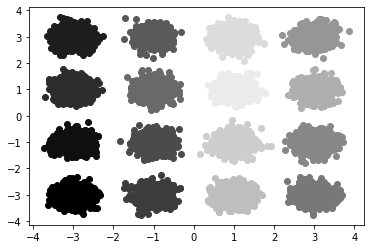

In [5]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color=np.asarray([0,0,0]), label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color=np.asarray([15,15,15])/255, label="Estado 1")
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], color=np.asarray([30,30,30])/255, label="Estado 0")
plt.scatter(X_train[y_train==3][:,0], X_train[y_train==3][:,1], color=np.asarray([45,45,45])/255, label="Estado 1")
plt.scatter(X_train[y_train==4][:,0], X_train[y_train==4][:,1], color=np.asarray([60,60,60])/255, label="Estado 0")
plt.scatter(X_train[y_train==5][:,0], X_train[y_train==5][:,1], color=np.asarray([75,75,75])/255, label="Estado 1")
plt.scatter(X_train[y_train==6][:,0], X_train[y_train==6][:,1], color=np.asarray([90,90,90])/255, label="Estado 0")
plt.scatter(X_train[y_train==7][:,0], X_train[y_train==7][:,1], color=np.asarray([105,105,105])/255, label="Estado 1")
plt.scatter(X_train[y_train==8][:,0], X_train[y_train==8][:,1], color=np.asarray([120,120,120])/255, label="Estado 0")
plt.scatter(X_train[y_train==9][:,0], X_train[y_train==9][:,1], color=np.asarray([135,135,135])/255, label="Estado 1")
plt.scatter(X_train[y_train==10][:,0], X_train[y_train==10][:,1], color=np.asarray([150,150,150])/255, label="Estado 0")
plt.scatter(X_train[y_train==11][:,0], X_train[y_train==11][:,1], color=np.asarray([175,175,175])/255, label="Estado 1")
plt.scatter(X_train[y_train==12][:,0], X_train[y_train==12][:,1], color=np.asarray([190,190,190])/255, label="Estado 0")
plt.scatter(X_train[y_train==13][:,0], X_train[y_train==13][:,1], color=np.asarray([205,205,205])/255, label="Estado 1")
plt.scatter(X_train[y_train==14][:,0], X_train[y_train==14][:,1], color=np.asarray([220,220,220])/255, label="Estado 0")
plt.scatter(X_train[y_train==15][:,0], X_train[y_train==15][:,1], color=np.asarray([235,235,235])/255, label="Estado 1")

In [6]:
plt.scatter(X_train[y_pred==0][:,0], X_train[y_pred==0][:,1], color=np.asarray([0,0,0]), label="Estado 0")
plt.scatter(X_train[y_pred==1][:,0], X_train[y_pred==1][:,1], color=np.asarray([15,15,15])/255, label="Estado 1")
plt.scatter(X_train[y_pred==2][:,0], X_train[y_pred==2][:,1], color=np.asarray([30,30,30])/255, label="Estado 0")
plt.scatter(X_train[y_pred==3][:,0], X_train[y_pred==3][:,1], color=np.asarray([45,45,45])/255, label="Estado 1")
plt.scatter(X_train[y_pred==4][:,0], X_train[y_pred==4][:,1], color=np.asarray([60,60,60])/255, label="Estado 0")
plt.scatter(X_train[y_pred==5][:,0], X_train[y_pred==5][:,1], color=np.asarray([75,75,75])/255, label="Estado 1")
plt.scatter(X_train[y_pred==6][:,0], X_train[y_pred==6][:,1], color=np.asarray([90,90,90])/255, label="Estado 0")
plt.scatter(X_train[y_pred==7][:,0], X_train[y_pred==7][:,1], color=np.asarray([105,105,105])/255, label="Estado 1")
plt.scatter(X_train[y_pred==8][:,0], X_train[y_pred==8][:,1], color=np.asarray([120,120,120])/255, label="Estado 0")
plt.scatter(X_train[y_pred==9][:,0], X_train[y_pred==9][:,1], color=np.asarray([135,135,135])/255, label="Estado 1")
plt.scatter(X_train[y_pred==10][:,0], X_train[y_pred==10][:,1], color=np.asarray([150,150,150])/255, label="Estado 0")
plt.scatter(X_train[y_pred==11][:,0], X_train[y_pred==11][:,1], color=np.asarray([175,175,175])/255, label="Estado 1")
plt.scatter(X_train[y_pred==12][:,0], X_train[y_pred==12][:,1], color=np.asarray([190,190,190])/255, label="Estado 0")
plt.scatter(X_train[y_pred==13][:,0], X_train[y_pred==13][:,1], color=np.asarray([205,205,205])/255, label="Estado 1")
plt.scatter(X_train[y_pred==14][:,0], X_train[y_pred==14][:,1], color=np.asarray([220,220,220])/255, label="Estado 0")
plt.scatter(X_train[y_pred==15][:,0], X_train[y_pred==15][:,1], color=np.asarray([235,235,235])/255, label="Estado 1")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14000 but corresponding boolean dimension is 6000